A pontuação média de silhueta é: 0.4798814508199817


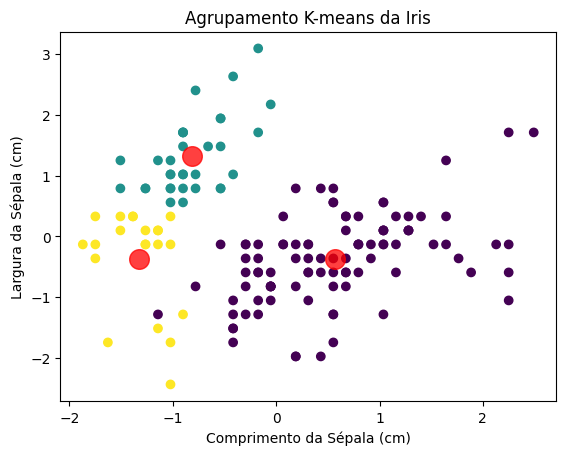

In [5]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Passo 1: Carregar os dados
iris = load_iris()
X = iris.data
y_true = iris.target  # Rótulos verdadeiros das espécies de íris

# Passo 2: Pré-processamento dos dados (se necessário)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Passo 3: Aplicar o algoritmo K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Passo 4: Avaliar o desempenho do modelo K-means
silhouette_avg = silhouette_score(X_scaled, labels)
print("A pontuação média de silhueta é:", silhouette_avg)

# Passo 5: Contar quantos tipos de íris foram encontrados em cada cluster
for cluster_label in np.unique(labels):
    print(f"Cluster {cluster_label}:")
    cluster_indices = np.where(labels == cluster_label)[0]
    species_counts = np.bincount(y_true[cluster_indices])
    species_names = iris.target_names[np.nonzero(species_counts)]
    print(f"Tipos de íris encontrados: {', '.join(species_names)}")

# Passo 6: Visualizar os resultados
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Largura da Sépala (cm)')
plt.title('Agrupamento K-means da Iris')
plt.show()
